In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt

# 5×5探索ゲーム

In [ ]:
class CompactQLearningAgent:
    def __init__(self, alpha=0.2, epsilon=0.1, gamma=0.99, actions=np.arange(4), observation=(0, 4)):
        self.alpha = alpha  # 学習率
        self.gamma = gamma  # 割引率
        self.epsilon = epsilon  # 探索率
        self.actions = actions  # 取りうる行動のリスト
        self.state = self.previous_state = str(observation)  # 現在と前の状態
        self.q_values = {self.state: np.zeros(len(actions))}  # Q値テーブルの初期化
        self.previous_action = None  # 前の行動

    def act(self):
        action = np.random.choice(self.actions) if np.random.uniform() < self.epsilon else np.argmax(self.q_values[self.state])
        self.previous_action = action  # 行動を記憶
        return action

    def observe_and_learn(self, next_state, reward):
        next_state_str = str(next_state)
        self.q_values.setdefault(next_state_str, np.zeros(len(self.actions)))
        if self.previous_action is not None:  # 初回の行動でなければ学習
            q = self.q_values[self.state][self.previous_action]
            max_q_next = np.max(self.q_values[next_state_str])
            self.q_values[self.state][self.previous_action] += self.alpha * (reward + self.gamma * max_q_next - q)
        self.previous_state, self.state = self.state, next_state_str

In [ ]:
class CompactGridWorld:
    def __init__(self):
        self.field_type = {"N": 0, "G": 1, "W": 2, "T": 3}
        self.map = np.array([
            [3, 2, 0, 0, 1],
            [0, 0, 0, 2, 2],
            [2, 0, 2, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 2, 2, 0]
        ])
        x = 0
        y = 4
        self.start_pos = (x, y)
        self.reset()

    def reset(self):
        self.agent_pos = self.start_pos
        return self.agent_pos

    def step(self, action):
        move = [(0, -1), (0, 1), (-1, 0), (1, 0)][action]
        next_pos = (self.agent_pos[0] + move[0], self.agent_pos[1] + move[1])

        # 壁のチェックとマップの範囲内かどうかを確認
        if not self._is_valid_position(next_pos):
            return self.agent_pos, -1, False  # 壁または範囲外に移動しようとした場合

        # 位置の更新と報酬の計算
        self.agent_pos = next_pos
        reward, is_goal = self._compute_reward_and_check_goal(next_pos)
        return next_pos, reward, is_goal

    def _is_valid_position(self, pos):
        x, y = pos
        if not (0 <= x < self.map.shape[1] and 0 <= y < self.map.shape[0]):
            return False  # マップの範囲外
        if self.map[y, x] == self.field_type["W"]:
            return False  # 壁
        return True

    def _compute_reward_and_check_goal(self, pos):
        x, y = pos
        field = self.map[y, x]
        if field == self.field_type["G"]:
            return 100, True  # ゴール
        elif field == self.field_type["T"]:
            return -100, True  # トラップ
        return 0, False  # 通常地点

    def _is_wall(self, pos):
        # 壁かどうかをチェックする関数（必要に応じて利用）
        x, y = pos
        return self.map[y, x] == self.field_type["W"]

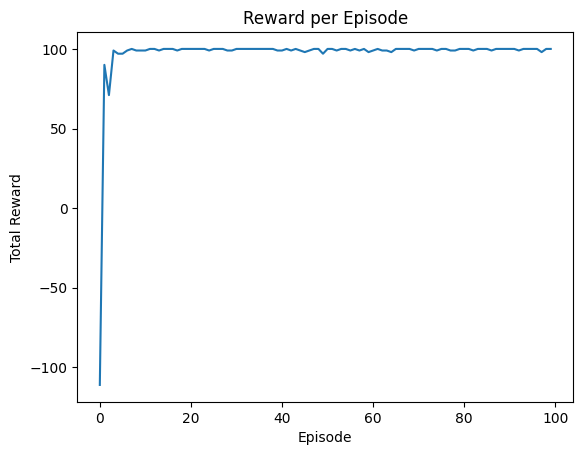

In [ ]:
if __name__ == '__main__':
    grid_env = CompactGridWorld()
    agent = CompactQLearningAgent(observation=grid_env.start_pos)
    rewards = []

    for episode in range(100):
        grid_env.reset()
        total_reward, is_end_episode = 0, False

        while not is_end_episode:
            action = agent.act()
            next_state, reward, is_end_episode = grid_env.step(action)
            agent.observe_and_learn(next_state, reward)
            total_reward += reward

        rewards.append(total_reward)

    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Reward per Episode")
    plt.show()

# 9×9探索ゲーム ハードモード

In [72]:
class CompactQLearningAgent:
    def __init__(self, alpha=0.2, epsilon=0.1, gamma=0.99, actions=np.arange(4), observation=(0, 8)):
        self.alpha = alpha  # 学習率
        self.gamma = gamma  # 割引率
        self.epsilon = epsilon  # 探索率
        self.actions = actions  # 取りうる行動のリスト
        self.state = self.previous_state = str(observation)  # 現在と前の状態
        self.q_values = {self.state: np.zeros(len(actions))}  # Q値テーブルの初期化
        self.previous_action = None  # 前の行動

    def act(self):
        action = np.random.choice(self.actions) if np.random.uniform() < self.epsilon else np.argmax(self.q_values[self.state])
        self.previous_action = action  # 行動を記憶
        return action

    def observe_and_learn(self, next_state, reward):
        next_state_str = str(next_state)
        self.q_values.setdefault(next_state_str, np.zeros(len(self.actions)))
        if self.previous_action is not None:  # 初回の行動でなければ学習
            q = self.q_values[self.state][self.previous_action]
            max_q_next = np.max(self.q_values[next_state_str])
            self.q_values[self.state][self.previous_action] += self.alpha * (reward + self.gamma * max_q_next - q)
        self.previous_state, self.state = self.state, next_state_str

In [73]:
class CompactGridWorld:
    def __init__(self):
        self.field_type = {"N": 0, "G": 1, "W": 2, "T": 3}
        self.map = np.array([
            [3, 2, 0, 0, 0, 0, 0, 0, 2],
            [0, 0, 0, 2, 2, 2, 2, 0, 2],
            [2, 0, 2, 0, 0, 0, 2, 0, 2],
            [0, 0, 2, 0, 2, 1, 2, 0, 0],
            [2, 0, 2, 0, 2, 2, 2, 0, 0],
            [0, 0, 2, 0, 0, 0, 2, 0, 2],
            [2, 0, 2, 3, 2, 0, 2, 0, 0],
            [0, 0, 2, 0, 2, 0, 2, 0, 2],
            [0, 0, 2, 0, 0, 0, 0, 0, 0]
        ])
        x = 0
        y = 8
        self.start_pos = (x, y)
        self.reset()

    def reset(self):
        self.agent_pos = self.start_pos
        return self.agent_pos

    def step(self, action):
        move = [(0, -1), (0, 1), (-1, 0), (1, 0)][action]
        next_pos = (self.agent_pos[0] + move[0], self.agent_pos[1] + move[1])

        # 壁のチェックとマップの範囲内かどうかを確認
        if not self._is_valid_position(next_pos):
            return self.agent_pos, -1, False  # 壁または範囲外に移動しようとした場合

        # 位置の更新と報酬の計算
        self.agent_pos = next_pos
        reward, is_goal = self._compute_reward_and_check_goal(next_pos)
        return next_pos, reward, is_goal

    def _is_valid_position(self, pos):
        x, y = pos
        if not (0 <= x < self.map.shape[1] and 0 <= y < self.map.shape[0]):
            return False  # マップの範囲外
        if self.map[y, x] == self.field_type["W"]:
            return False  # 壁
        return True

    def _compute_reward_and_check_goal(self, pos):
        x, y = pos
        field = self.map[y, x]
        if field == self.field_type["G"]:
            return 100, True  # ゴール
        elif field == self.field_type["T"]:
            return -100, True  # トラップ
        return 0, False  # 通常地点

    def _is_wall(self, pos):
        # 壁かどうかをチェックする関数（必要に応じて利用）
        x, y = pos
        return self.map[y, x] == self.field_type["W"]

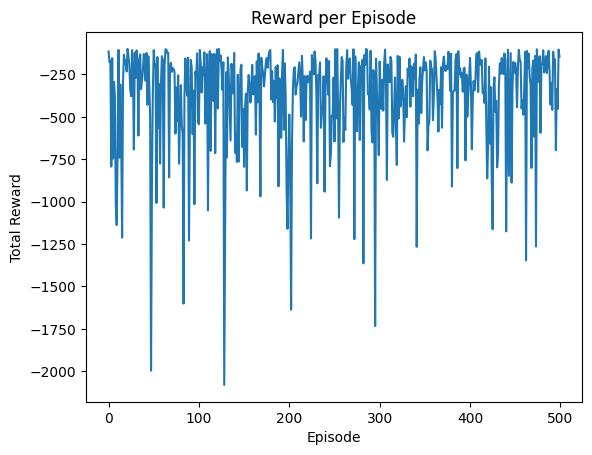

In [75]:
if __name__ == '__main__':
    grid_env = CompactGridWorld()
    agent = CompactQLearningAgent(observation=grid_env.start_pos)
    rewards = []

    for episode in range(500):
        grid_env.reset()
        total_reward, is_end_episode = 0, False

        while not is_end_episode:
            action = agent.act()
            next_state, reward, is_end_episode = grid_env.step(action)
            agent.observe_and_learn(next_state, reward)
            total_reward += reward

        rewards.append(total_reward)

    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Reward per Episode")
    plt.show()

# 9×9探索ゲーム スタンダードモード

In [ ]:
class CompactQLearningAgent:
    def __init__(self, alpha=0.2, epsilon=0.1, gamma=0.99, actions=np.arange(4), observation=(0, 8)):
        self.alpha = alpha  # 学習率
        self.gamma = gamma  # 割引率
        self.epsilon = epsilon  # 探索率
        self.actions = actions  # 取りうる行動のリスト
        self.state = self.previous_state = str(observation)  # 現在と前の状態
        self.q_values = {self.state: np.zeros(len(actions))}  # Q値テーブルの初期化
        self.previous_action = None  # 前の行動

    def act(self):
        action = np.random.choice(self.actions) if np.random.uniform() < self.epsilon else np.argmax(self.q_values[self.state])
        self.previous_action = action  # 行動を記憶
        return action

    def observe_and_learn(self, next_state, reward):
        next_state_str = str(next_state)
        self.q_values.setdefault(next_state_str, np.zeros(len(self.actions)))
        if self.previous_action is not None:  # 初回の行動でなければ学習
            q = self.q_values[self.state][self.previous_action]
            max_q_next = np.max(self.q_values[next_state_str])
            self.q_values[self.state][self.previous_action] += self.alpha * (reward + self.gamma * max_q_next - q)
        self.previous_state, self.state = self.state, next_state_str

In [ ]:
class CompactGridWorld:
    def __init__(self):
        self.field_type = {"N": 0, "G": 1, "W": 2, "T": 3}
        self.map = np.array([
            [0, 2, 0, 0, 0, 0, 0, 0, 1],
            [0, 0, 0, 2, 0, 0, 2, 0, 2],
            [2, 0, 2, 0, 3, 0, 2, 0, 2],
            [0, 0, 2, 0, 0, 0, 0, 0, 0],
            [2, 0, 0, 0, 0, 0, 2, 0, 0],
            [0, 0, 2, 0, 0, 0, 0, 0, 2],
            [2, 0, 0, 0, 2, 0, 2, 0, 0],
            [0, 0, 2, 0, 2, 0, 2, 0, 2],
            [0, 0, 2, 0, 0, 0, 0, 0, 0]
        ])
        x = 0
        y = 8
        self.start_pos = (x, y)
        self.reset()

    def reset(self):
        self.agent_pos = self.start_pos
        return self.agent_pos

    def step(self, action):
        move = [(0, -1), (0, 1), (-1, 0), (1, 0)][action]
        next_pos = (self.agent_pos[0] + move[0], self.agent_pos[1] + move[1])

        # 壁のチェックとマップの範囲内かどうかを確認
        if not self._is_valid_position(next_pos):
            return self.agent_pos, -1, False  # 壁または範囲外に移動しようとした場合

        # 位置の更新と報酬の計算
        self.agent_pos = next_pos
        reward, is_goal = self._compute_reward_and_check_goal(next_pos)
        return next_pos, reward, is_goal

    def _is_valid_position(self, pos):
        x, y = pos
        if not (0 <= x < self.map.shape[1] and 0 <= y < self.map.shape[0]):
            return False  # マップの範囲外
        if self.map[y, x] == self.field_type["W"]:
            return False  # 壁
        return True

    def _compute_reward_and_check_goal(self, pos):
        x, y = pos
        field = self.map[y, x]
        if field == self.field_type["G"]:
            return 100, True  # ゴール
        elif field == self.field_type["T"]:
            return -100, True  # トラップ
        return 0, False  # 通常地点

    def _is_wall(self, pos):
        # 壁かどうかをチェックする関数（必要に応じて利用）
        x, y = pos
        return self.map[y, x] == self.field_type["W"]

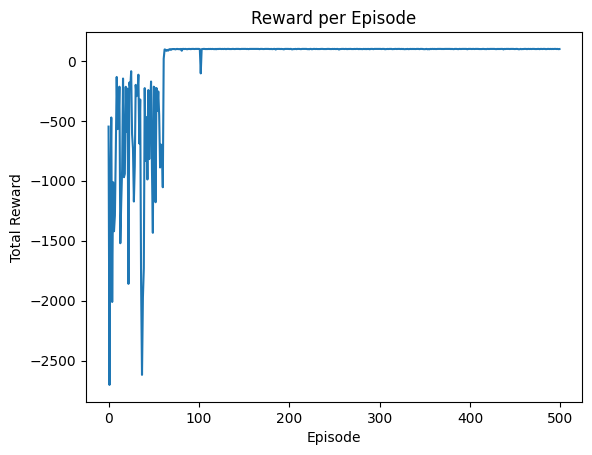

In [ ]:
if __name__ == '__main__':
    grid_env = CompactGridWorld()
    agent = CompactQLearningAgent(observation=grid_env.start_pos)
    rewards = []

    for episode in range(500):
        grid_env.reset()
        total_reward, is_end_episode = 0, False

        while not is_end_episode:
            action = agent.act()
            next_state, reward, is_end_episode = grid_env.step(action)
            agent.observe_and_learn(next_state, reward)
            total_reward += reward

        rewards.append(total_reward)

    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Reward per Episode")
    plt.show()